In [1]:
#import libraries

import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from osgeo import gdal
from rasterio.plot import show
import os

print('*********** Libraries were imported successfuly **********')
print('working directory: '+ str(os.getcwd()))

*********** Libraries were imported successfuly **********
working directory: C:\Users\s79631\Documents\Python_ökoneu


**************** Loading classification file *************
**************** Image imported successfuly **************
**********************************************************
*********************** Image data ***********************
Number of bands: 1
Coordinate Reference System: PROJCS["unnamed",GEOGCS["ETRS 1989",DATUM["ETRS 1989",SPHEROID["GRS 1980",6378137,298.257222096042],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Image width:`901
Image height:`501
Number of Pixels:`451401
**********************************************************
************** extracting classification data ************
************ classification successfully loaded **********
Grassland/agr

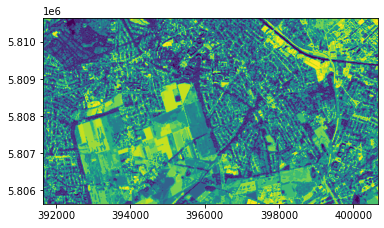

<AxesSubplot:>

In [4]:
#load classification image

print('**************** Loading classification file *************')
gdal.UseExceptions()
img_clas = rs.open ('20200928_sent_ökoneu_mask_etrs89.img')
print('**************** Image imported successfuly **************')

## Print image data
print('**********************************************************')
print('*********************** Image data ***********************')
print('Number of bands: ' + str(img_clas.count))
print('Coordinate Reference System: ' + str(img_clas.crs))
print('Image width:`' + str(img_clas.width))
print('Image height:`' + str(img_clas.height))
print('Number of Pixels:`' + str(int(img_clas.height)*int(img_clas.width)))
print('**********************************************************')

## create groups using mask values from ERDAS classification mask
#grassland = [13,15,18,19,21,22,25,27,28,32,33] for 2015
grassland = [12,13,15,16,17,20,23,25,28,29,31,33]
#tree_canopy = [2,4,7,9,11,12,16]
tree_canopy = [3,5,6,7,8,9]

tree_list = list()
grass_list = list()

## get bands
print('************** extracting classification data ************')
clas_values = img_clas.read(1)

seeker_column = 0
while seeker_column < img_clas.width:
    seeker_row = 0
    while seeker_row < img_clas.height:
        arr = clas_values[seeker_row]
        pos = (seeker_row,seeker_column)
        if arr[seeker_column] in grassland:
            grass_list.append(pos)
        if arr[seeker_column] in tree_canopy:
            tree_list.append(pos)
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1

print('************ classification successfully loaded **********')    
print('Grassland/agriculture values...................'+str(len(grass_list)))   
print('Tree Canopy values.............................'+str(len(tree_list))) 
print('***********************************************************') 
   
print(grass_list[1])
#print((clas_values[200]))
#print(type(clas_values[1]))
#x = clas_values[200] #x = classvalues [row]
#print (x[1]) #value x[column]



#for elementa in (clas_values [200]):
    #if elementa in grassland:
        #print("V")
    #else:
       #print("F")

show(img_clas)

**************** Loading classification file *************
**************** Image imported successfuly **************
12
0.2362328
**********************************************************
****************** Analysing values... *******************
**********************************************************
******************** Analysis completed *******************
**********************************************************
****************Scene analysis results *******************
Scene NDVI [0.7, 1]...................... 0 pixels
Scene NDVI [0.55, 0.7] .................. 0 pixels
Scene NDVI [0.45-0.55]................... 0 pixels
Scene NDVI [0.35-0.45]................... 11 pixels
Scene NDVI [0.25-0.35]................... 39 pixels
Scene NDVI [0.0-0.25].................... 46 pixels
Scene NDVI [<0.0]......................... 4 pixels
**********************************************************
Mean NDVI (ignore negative values)....... 0.24920714
Scene NDVI (incl. negative values).......

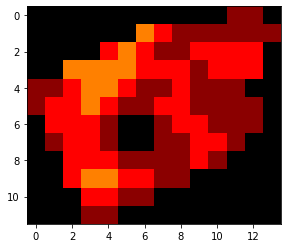

In [82]:
#load pond NDVI image

print('**************** Loading classification file *************')
gdal.UseExceptions()
img = rs.open ('20201219_buckowerdorfteich_ndvi.img')
print('**************** Image imported successfuly **************')

## get bands
Index_Values = img.read(1)
print(len(Index_Values))

## stats
from scipy import stats
#stats.describe (Index_Values) #activate just if needed

ndvi_scene = np.nanmean(Index_Values)

print(ndvi_scene)


print('**********************************************************')
print('****************** Analysing values... *******************')
print('**********************************************************')

## create classification conters and indexing lists 

very_healthy = 0 # values between [0.7-1]
very_healthy_dic = list()

healthy = 0 # values between [0.55-0.7]
healthy_dic = list()

lightstress = 0 # values between [0.45-0.55]
light_dic = list()

moderatestress = 0 # values between [0.35-0.45]
moderate_dic = list()

heavystress = 0 # values between [0.25-0.35]
heavy_dic = list()

bare_soil = 0 # values between [<0.25]
bare_soil_dic = list

no_veg = 0 # values between [<0]
no_veg_dic = list

# create numpy-array for masking for report

output_format = ".png"
t=(img.height, img.width,3)
mask=np.zeros(t,dtype=np.uint8)

#Define Masking Colours

colors= [(0,0,0),(139,0,0),(255,0,0),(255,128,0),(255,255,0),(127,255,0),(50,205,50)]

# Classify Pixels
NDVI_tree=list()
NDVI_veg=list()
NDVI_grass=list()
NDVI_neg=list()
NDVI_accum = list()
counter_total= 0
counter_neg= 0

seeker_column = 0
while seeker_column < img.width:
    seeker_row = 0
    while seeker_row < img.height:
        if Index_Values[seeker_row, seeker_column] <= 0:
            mask[seeker_row, seeker_column] = colors[0]
            no_veg = no_veg+1
        else:
            if Index_Values[seeker_row, seeker_column] <= 0.25:
                mask[seeker_row, seeker_column] = colors[1]
                bare_soil = bare_soil+1
            else:
                if Index_Values[seeker_row, seeker_column] <= 0.35:
                    mask[seeker_row, seeker_column] = colors[2]
                    heavystress = heavystress+1
                else:
                    if Index_Values[seeker_row, seeker_column] <= 0.45:
                        mask[seeker_row, seeker_column] = colors[3]
                        moderatestress = moderatestress + 1
                    else:
                        if Index_Values[seeker_row, seeker_column] <= 0.55:
                            mask[seeker_row, seeker_column] = colors[4]
                            lightstress = lightstress + 1
                        else:
                            if Index_Values[seeker_row, seeker_column] <= 0.7:
                                mask[seeker_row, seeker_column] = colors[5]
                                healthy = healthy + 1
                            else:
                                if Index_Values[seeker_row, seeker_column] <= 1:
                                    mask[seeker_row, seeker_column] = colors[6]
                                    very_healthy = very_healthy + 1
                                else:
                                    mask[seeker_row, seeker_column] = colors[0]
        if Index_Values[seeker_row, seeker_column] >= 0:
            NDVI_accum.append(Index_Values[seeker_row, seeker_column])
            
        NDVI_neg.append(Index_Values[seeker_row, seeker_column])
        seeker_row = seeker_row+1
    seeker_column = seeker_column+1


#Calculation of areas                                
    
veg_area = 10*10/10000*(int(very_healthy)+int(healthy)+int(lightstress)+int(moderatestress)+int(heavystress))
no_veg_area = int(no_veg)*10*10/10000

NDVI_mean = np.nanmean(NDVI_accum)
NDVI_scene = np.nanmean(NDVI_neg)

print('******************** Analysis completed *******************')
print('**********************************************************')
print('****************Scene analysis results *******************')
print('Scene NDVI [0.7, 1]...................... ' + str(very_healthy) + " pixels")
print('Scene NDVI [0.55, 0.7] .................. ' + str(healthy) + " pixels")
print('Scene NDVI [0.45-0.55]................... ' + str(lightstress) + " pixels")
print('Scene NDVI [0.35-0.45]................... ' + str(moderatestress) + " pixels")
print('Scene NDVI [0.25-0.35]................... ' + str(heavystress) + " pixels")
print('Scene NDVI [0.0-0.25].................... ' + str(bare_soil) + " pixels")
print('Scene NDVI [<0.0]......................... ' + str(no_veg) + " pixels")
print('**********************************************************')
print('Mean NDVI (ignore negative values)....... ' + str(NDVI_mean))
print('Scene NDVI (incl. negative values)....... ' + str(NDVI_scene))
print('**********************************************************')
print('Total  area ............................. ' + str(float(no_veg_area)+float(veg_area)) + " hectareas")
print('**********************************************************')
print('                                                          ')

# Plot mask

mask_plot = Image.fromarray(mask, 'RGB')
mask_plot.save('20201219_buckowerdorfteich_NDVI_mask.png')
plt.imshow(mask_plot)